# **Máquinas de Vectores de Soporte (SVM)**

En este notebook exploramos, paso a paso, los conceptos y ejemplos prácticos de las Máquinas de Vectores de Soporte para clasificación y regresión. Se incluyen además ejercicios y soluciones para profundizar en el tema.

In [1]:
import matplotlib.pyplot as plt

# Clasificación con SVM Lineal

En esta sección veremos cómo entrenar un SVM lineal para clasificación. El libro comienza mostrando unas figuras ilustrativas antes del primer ejemplo de código, por lo que las siguientes celdas generan y guardan dichas figuras. Puedes omitirlas si lo deseas, pero son útiles para entender el comportamiento del clasificador.

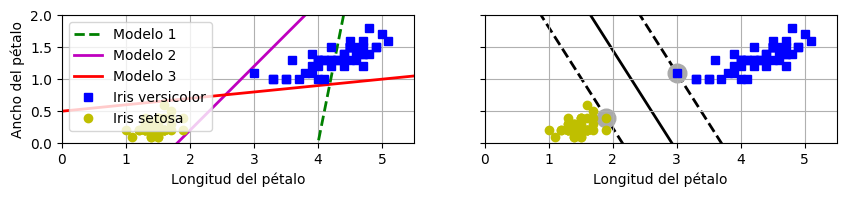

In [2]:
# Código adicional – Esta celda genera y guarda la Figura 5–1.
# 
# Explicación:
# - Se carga el dataset Iris y se seleccionan las características "longitud del pétalo" y "ancho del pétalo".
# - Se filtran únicamente las clases Iris setosa e Iris versicolor.
# - Se entrena un clasificador SVM lineal con un valor muy alto de C para forzar el margen máximo.
# - Se definen tres “modelos malos” (líneas de predicción arbitrarias) para compararlos visualmente.
# - Se dibuja la frontera de decisión y los márgenes junto con los vectores de soporte.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

# Cargamos el dataset Iris
iris = datasets.load_iris(as_frame=True)
# Seleccionamos las características "longitud del pétalo" y "ancho del pétalo"
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# Filtramos para quedarnos solo con Iris setosa (0) e Iris versicolor (1)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Entrenamos un clasificador SVM lineal con C muy alto (efectivamente sin regularización)
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Modelos "malos" para comparación visual (líneas arbitrarias)
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    """
    Dibuja la frontera de decisión del clasificador SVM, junto con los márgenes y los vectores de soporte.
    """
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # En la frontera de decisión: w0*x0 + w1*x1 + b = 0  =>  x1 = -w0/w1 * x0 - b/w1
    x0_vals = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0_vals - b / w[1]

    # La distancia al margen es 1/|w1|
    margin = 1 / abs(w[1])
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0_vals, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0_vals, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0_vals, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Primer subplot: muestra los modelos malos y los puntos
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2, label="Modelo 1")
plt.plot(x0, pred_2, "m-", linewidth=2, label="Modelo 2")
plt.plot(x0, pred_3, "r-", linewidth=2, label="Modelo 3")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

# Segundo subplot: muestra la frontera de decisión del SVM y sus márgenes
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Longitud del pétalo")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

A continuación, generamos otra figura que muestra la sensibilidad de un SVM a la escala de las características.

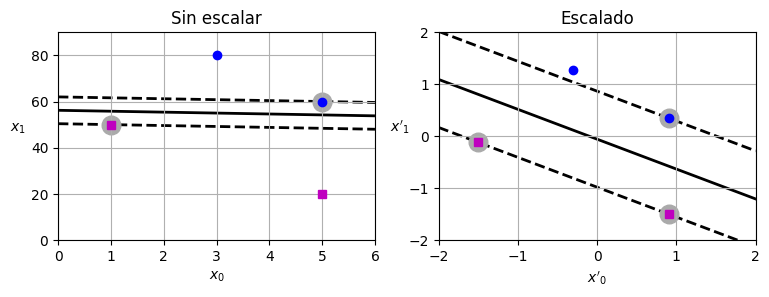

In [3]:
# Código adicional – Esta celda genera y guarda la Figura 5–2.
#
# Explicación:
# - Se crea un conjunto de datos pequeño (Xs, ys) con dos características de magnitudes muy distintas.
# - Se entrena un SVM lineal tanto en los datos originales como en los escalados (usando StandardScaler).
# - Se comparan las fronteras de decisión para ver el efecto de la escala de las características.

from sklearn.preprocessing import StandardScaler

# Datos de ejemplo con escalas muy diferentes
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]], dtype=np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))

# Primer subplot: datos sin escalar
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Sin escalar")
plt.axis([0, 6, 0, 90])
plt.grid()

# Segundo subplot: datos escalados
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Escalado")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

## Clasificación con margen suave

Ahora veremos cómo afectan los outliers (valores atípicos) al modelo SVM y cómo el uso de un margen suave permite cierta tolerancia en la clasificación.

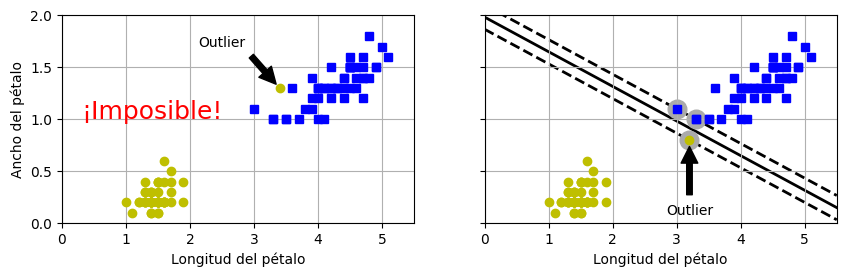

In [4]:
# Código adicional – Esta celda genera y guarda la Figura 5–3.
#
# Explicación:
# - Se añaden outliers al conjunto original.
# - Se crean dos conjuntos de datos: uno con el primer outlier y otro con el segundo.
# - Se entrena un SVM con C muy alto para forzar una clasificación estricta.
# - Se ilustran, en dos subplots, el efecto de los outliers en la separación y el margen.

# Creamos algunos outliers
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Entrenamos un SVM en el conjunto con el segundo outlier
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# Primer subplot: muestra el conjunto con el primer outlier (la separación es imposible)
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(0.3, 1.0, "¡Imposible!", color="red", fontsize=18)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.annotate(
    "Outlier",
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

# Segundo subplot: muestra el conjunto con el segundo outlier y la frontera de decisión ajustada
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Longitud del pétalo")
plt.annotate(
    "Outlier",
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.08),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
)
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

**Nota:**  
El valor predeterminado del hiperparámetro `dual` en los estimadores `LinearSVC` y `LinearSVR` cambiará de `True` a `"auto"` en Scikit-Learn 1.4. Aquí se establece `dual=True` en todo el notebook para que la salida sea consistente.

In [5]:
# A continuación usamos el dataset Iris para clasificar la clase Iris virginica (positiva) contra las demás (negativa).
# Se utiliza un pipeline que incluye escalado y el clasificador LinearSVC.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
# Definimos la etiqueta: True para Iris virginica, False para las otras
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [6]:
# Realizamos predicciones para nuevos ejemplos
X_new = [[5.5, 1.7], [5.0, 1.5]]
print("Predicciones:", svm_clf.predict(X_new))

Predicciones: [ True False]


In [ ]:
# Mostramos las puntuaciones de decisión (distancia a la frontera de decisión)
print("Función de decisión:", svm_clf.decision_function(X_new))

A continuación se muestra otra figura comparativa que ilustra el efecto de modificar el parámetro de regularización C en el clasificador SVM lineal.

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_36262/434310541.py:31: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_36262/434310541.py:32: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()


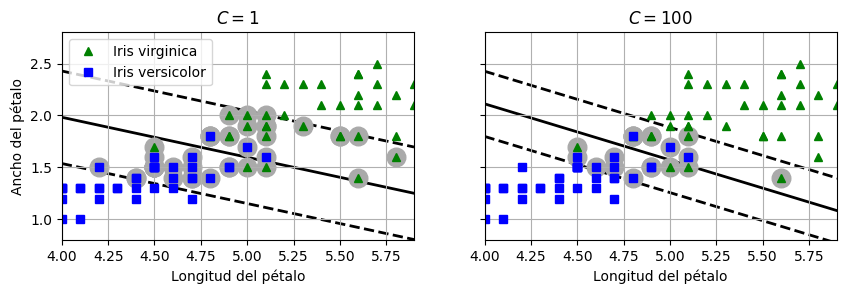

In [7]:
# Código adicional – Esta celda genera y guarda la Figura 5–4.
#
# Explicación:
# - Se entrenan dos modelos LinearSVC con diferentes valores de C (1 y 100).
# - Se escalan los datos para que el entrenamiento sea más estable.
# - Se “convierte” manualmente a parámetros no escalados para dibujar correctamente la frontera de decisión.
# - Se calculan los vectores de soporte y se dibujan las fronteras de decisión en dos subplots para comparar el efecto de la regularización.

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Convertir los parámetros a la escala original
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Calcular los vectores de soporte (LinearSVC no lo hace automáticamente)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Longitud del pétalo")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.show()

# Clasificación con SVM no lineal

Ahora exploraremos cómo aplicar SVM en problemas no lineales mediante la transformación de los datos a espacios de mayor dimensión o utilizando núcleos (kernels).

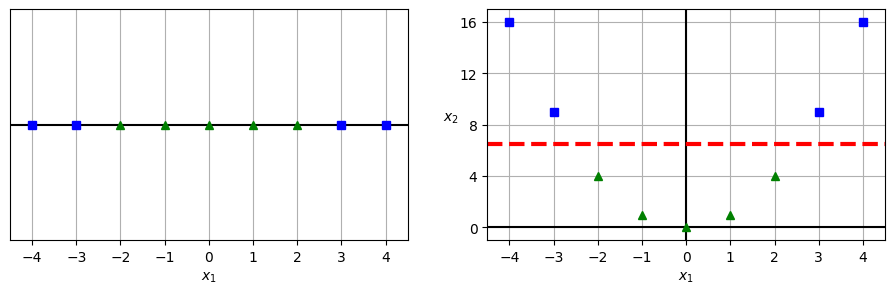

In [8]:
# Código adicional – Esta celda genera y guarda la Figura 5–5.
#
# Explicación:
# - Se genera un conjunto de datos 1D y se extiende a 2D usando una transformación cuadrática.
# - Se muestran las representaciones en 1D (con puntos en una línea) y en 2D.
# - Se dibuja una línea (en rojo) para ilustrar cómo una frontera lineal en el espacio transformado equivale a una frontera no lineal en el espacio original.

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y == 1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

In [9]:
# Ahora trabajamos con el dataset "moons", que es un clásico ejemplo no lineal.
# Se utiliza un pipeline que incluye:
# - Transformación polinómica (grado 3)
# - Escalado
# - Un clasificador lineal (LinearSVC) con pérdida "hinge"
#
# De esta forma, se logra una clasificación no lineal mediante la transformación de las características.

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, dual=True, max_iter=10000, random_state=42))])

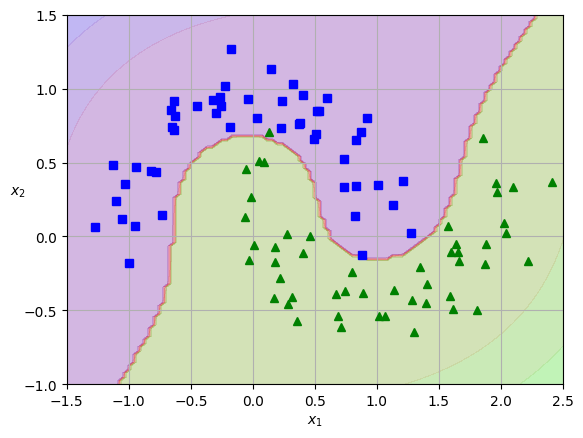

In [10]:
# Código adicional – Esta celda genera y guarda la Figura 5–6.
#
# Se definen dos funciones auxiliares:
# - plot_dataset: para dibujar los puntos del dataset.
# - plot_predictions: para dibujar las predicciones y la función de decisión sobre una malla.
#
# Se utiliza para visualizar la frontera de decisión resultante del clasificador polinómico.

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_grid).reshape(x0.shape)
    y_decision = clf.decision_function(X_grid).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Núcleo polinómico

Ahora usaremos el núcleo polinómico directamente con el clasificador SVC.

In [11]:
from sklearn.svm import SVC

# Entrenamos un SVC con kernel polinómico (grado 3)
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                    SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

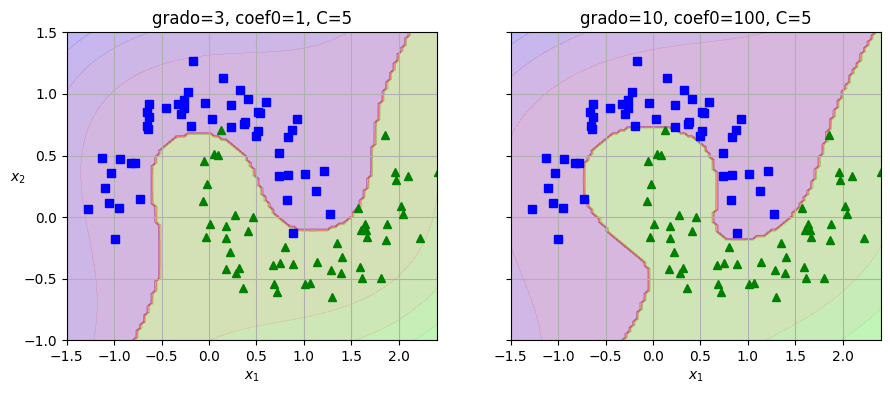

In [12]:
# Código adicional – Esta celda genera y guarda la Figura 5–7.
#
# Se entrena un segundo modelo SVC con kernel polinómico, pero con parámetros:
# grado 10, coef0=100 y C=5.
# Se dibujan las fronteras de decisión de ambos modelos para compararlos.

poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=100, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("grado=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("grado=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

## Funciones de similitud

En esta sección se muestra cómo se pueden crear nuevas características que miden la similitud entre una instancia y ciertos “landmarks” (puntos de referencia). Esto es la base de muchos métodos kernel.

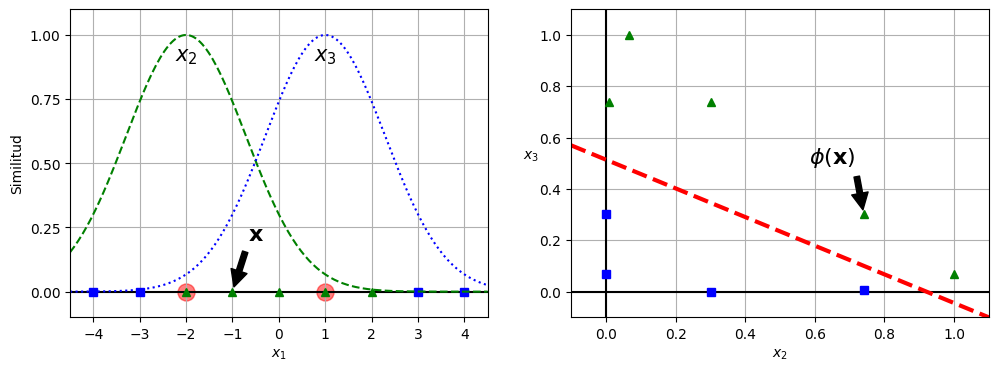

In [13]:
# Código adicional – Esta celda genera y guarda la Figura 5–8.
#
# Se define la función gaussiana RBF y se calcula la similitud de los puntos respecto a dos landmarks.
# Se ilustra la transformación de los datos originales a este nuevo espacio de similitud.

def gaussian_rbf(x, landmark, gamma):
    """
    Calcula la similitud RBF gaussiana entre cada punto en x y un landmark.
    """
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Transformamos los datos 1D usando la función RBF para dos landmarks: -2 y 1.
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similitud")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

## Núcleo RBF Gaussiano

Se entrena un SVC utilizando el núcleo RBF (función gaussiana) para abordar problemas no lineales.

In [14]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

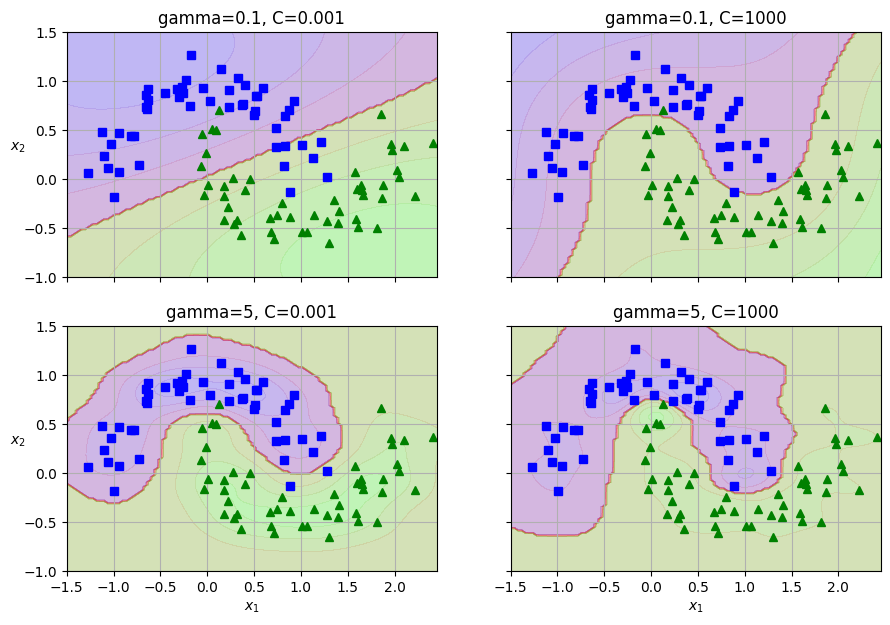

In [15]:
# Código adicional – Esta celda genera y guarda la Figura 5–9.
#
# Se entrenan varios modelos SVC con diferentes combinaciones de hiperparámetros (gamma y C)
# y se dibujan sus fronteras de decisión en un arreglo de 2x2 subplots para comparar su comportamiento.

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", gamma=gamma, C=C)
    )
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma_val, C_val = hyperparams[i]
    plt.title(f"gamma={gamma_val}, C={C_val}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# Regresión con SVM

Además de clasificación, las SVM se pueden utilizar para regresión. En esta sección veremos dos ejemplos:
- Regresión lineal con LinearSVR.
- Regresión con núcleo polinómico usando SVR.

In [17]:
from sklearn.svm import LinearSVR

# Código adicional – Estas 3 líneas generan un conjunto de datos lineal simple
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

# Entrenamos un modelo de regresión SVM lineal (LinearSVR)
svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

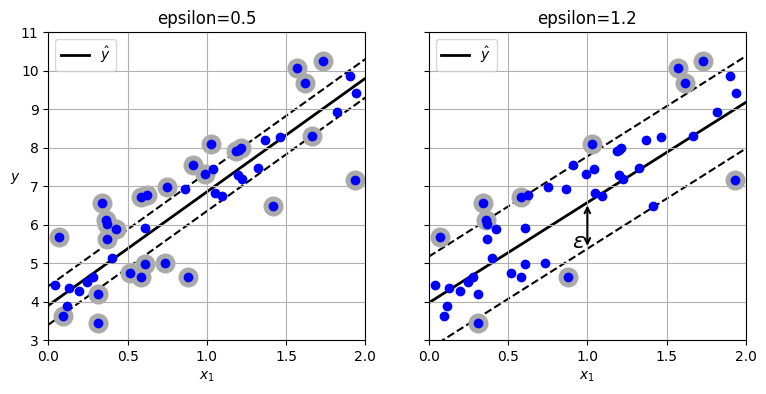

In [18]:
# Código adicional – Esta celda genera y guarda la Figura 5–10.
#
# Se definen dos funciones:
# - find_support_vectors: encuentra los índices de las instancias que están fuera del margen ε.
# - plot_svm_regression: dibuja la predicción del modelo, los márgenes y los vectores de soporte.
#
# Se comparan dos modelos de regresión SVM con diferentes valores de epsilon.

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

# Entrenamos un segundo modelo con un epsilon mayor para ver el efecto
svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

# Encontramos los vectores de soporte para cada modelo
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
plt.show()

In [19]:
from sklearn.svm import SVR

# Código adicional – Estas 3 líneas generan un conjunto de datos cuadrático simple
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

# Entrenamos un SVR con núcleo polinómico (grado 2)
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

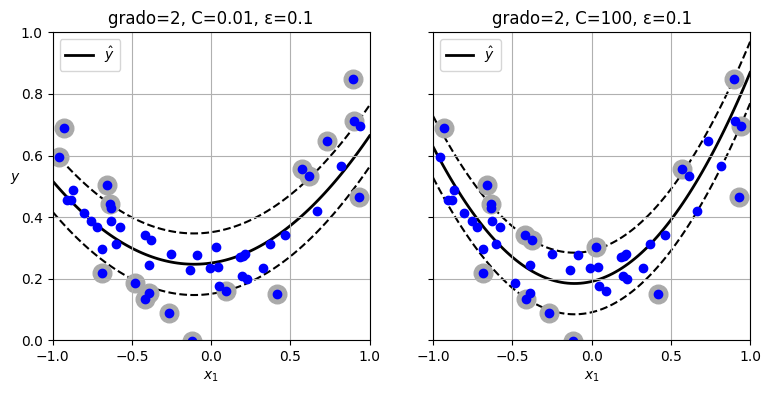

In [20]:
# Código adicional – Esta celda genera y guarda la Figura 5–11.
#
# Se entrena un segundo modelo de SVR con parámetros distintos para comparar.
# Se dibujan las predicciones y se identifican los vectores de soporte.

svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"grado={svm_poly_reg[-1].degree}, C={svm_poly_reg[-1].C}, ε={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"grado={svm_poly_reg2[-1].degree}, C={svm_poly_reg2[-1].C}, ε={svm_poly_reg2[-1].epsilon}")
plt.grid()
plt.show()

# Bajo el Capó

En esta sección se muestran detalles internos de las SVM, como la relación entre el parámetro de peso y el margen, y se visualizan las funciones de pérdida (hinge loss) y su versión cuadrática.

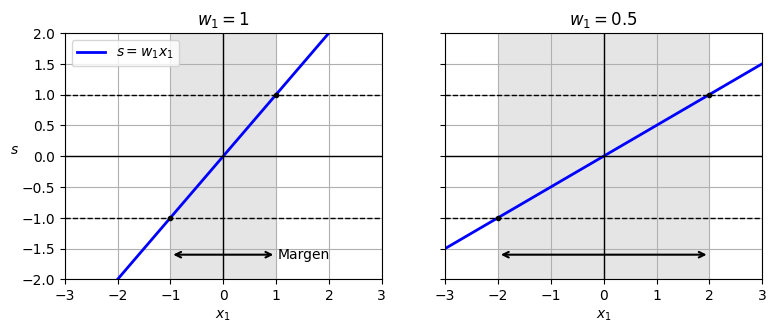

In [21]:
# Código adicional – Esta celda genera y guarda la Figura 5–12.
#
# Explicación:
# - Se define una función para graficar la función de decisión 2D para diferentes valores de w (peso) y el margen correspondiente.
# - Se dibujan dos subplots para comparar el efecto de un peso mayor o menor en la anchura del margen.

import matplotlib.patches as patches

def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y_vals = w * x1 + b
    half_margin = 1 / abs(w)

    plt.plot(x1, y_vals, "b-", linewidth=2, label=r"$s = w_1 x_1$")
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    rect = patches.Rectangle((-half_margin, -2), 2 * half_margin, 4,
                             edgecolor='none', facecolor='gray', alpha=0.2)
    plt.gca().add_patch(rect)
    plt.plot([-3, 3], [1, 1], "k--", linewidth=1)
    plt.plot([-3, 3], [-1, -1], "k--", linewidth=1)
    plt.plot(half_margin, 1, "k.")
    plt.plot(-half_margin, -1, "k.")
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel("$x_1$")
    if ylabel:
        plt.ylabel("$s$", rotation=0, labelpad=5)
        plt.legend()
        plt.text(1.02, -1.6, "Margen", ha="left", va="center", color="k")

    plt.annotate(
        '', xy=(-half_margin, -1.6), xytext=(half_margin, -1.6),
        arrowprops={'ec': 'k', 'arrowstyle': '<->', 'linewidth': 1.5}
    )
    plt.title(f"$w_1 = {w}$")

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.grid()
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.grid()
plt.show()

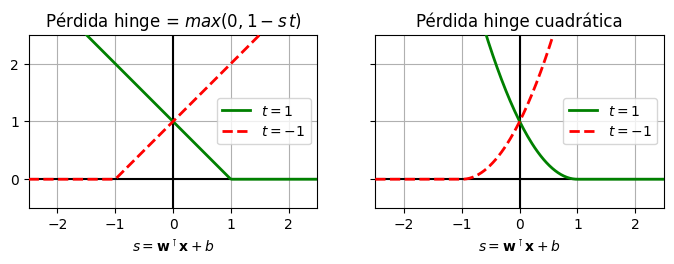

In [22]:
# Código adicional – Esta celda genera y guarda la Figura 5–13.
#
# Se grafican la función hinge loss (pérdida de bisagra) y la versión cuadrática de la misma para las etiquetas t=1 y t=-1.
# Esto ilustra cómo varía la penalización según la distancia a la frontera de decisión.

s = np.linspace(-2.5, 2.5, 200)
hinge_pos = np.where(1 - s < 0, 0, 1 - s)  # max(0, 1 - s)
hinge_neg = np.where(1 + s < 0, 0, 1 + s)  # max(0, 1 + s)

titles = (r"Pérdida hinge = $max(0, 1 - s\,t)$", "Pérdida hinge cuadrática")

fix, axs = plt.subplots(1, 2, sharey=True, figsize=(8.2, 3))

for ax, loss_pos, loss_neg, title in zip(
        axs, (hinge_pos, hinge_pos ** 2), (hinge_neg, hinge_neg ** 2), titles):
    ax.plot(s, loss_pos, "g-", linewidth=2, zorder=10, label="$t=1$")
    ax.plot(s, loss_neg, "r--", linewidth=2, zorder=10, label="$t=-1$")
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlabel(r"$s = \mathbf{w}^\intercal \mathbf{x} + b$")
    ax.axis([-2.5, 2.5, -0.5, 2.5])
    ax.legend(loc="center right")
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 2.5, 1))
    ax.set_aspect("equal")

plt.show()

# Material Extra

A continuación se muestra una implementación personalizada de un clasificador SVM lineal utilizando descenso de gradiente por lotes. Esto es útil para comprender en detalle cómo funciona el algoritmo de optimización.

## Implementación de un clasificador SVM lineal usando descenso de gradiente por lotes

Se define la clase `MyLinearSVC` que:
- Inicializa los parámetros del modelo de forma aleatoria.
- Utiliza una tasa de aprendizaje que disminuye con el número de épocas.
- Realiza el entrenamiento mediante descenso de gradiente sobre el conjunto de datos.
- Calcula la función de decisión y realiza predicciones.

Se comparará el rendimiento de este modelo con el de los estimadores de Scikit-Learn.

In [23]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)

In [25]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        # Tasa de aprendizaje que decrece con el número de épocas
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Inicialización aleatoria
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # Pesos para cada característica
        b = 0

        # Convertimos las etiquetas a -1 y 1
        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1
        X_t = X * t  # Multiplicamos cada fila por su etiqueta
        self.Js = []  # Lista para almacenar la función de costo en cada época

        # Entrenamiento mediante descenso de gradiente
        for epoch in range(self.n_epochs):
            # Identificamos los vectores de soporte (donde la condición  t*(w^T x + b) < 1 se cumple)
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            # Calculamos la función de costo (pérdida + término de regularización)
            J = 0.5 * (w * w).sum() + self.C * ((1 - X_t_sv.dot(w)).sum() - b * t_sv.sum())
            self.Js.append(J)

            # Derivada de la función de costo con respecto a w y b
            w_gradient_vector = w - self.C * X_t_sv.sum(axis=0).reshape(-1, 1)
            b_derivative = -self.C * t_sv.sum()
                
            # Actualización de los parámetros
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        # Recalculamos los vectores de soporte con los parámetros finales
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return self.decision_function(X) >= 0

In [26]:
# Entrenamos nuestro clasificador SVM lineal personalizado con unos hiperparámetros ajustados.
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
print("Predicciones MyLinearSVC:", svm_clf.predict(np.array([[5, 2], [4, 1]])))

Predicciones MyLinearSVC: [[ True]
 [False]]


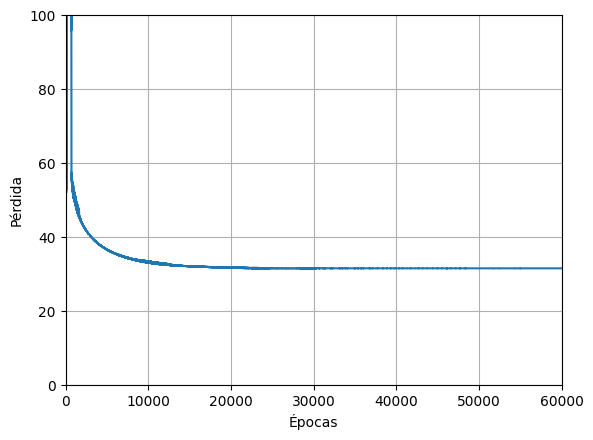

In [27]:
# Mostramos la evolución de la función de costo a lo largo de las épocas.
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid()
plt.show()

In [28]:
print("Parámetros MyLinearSVC:", svm_clf.intercept_, svm_clf.coef_)

Parámetros MyLinearSVC: [-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [29]:
# Comparación con el clasificador SVC de Scikit-Learn
from sklearn.svm import SVC

svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print("Parámetros SVC:", svm_clf2.intercept_, svm_clf2.coef_)

Parámetros SVC: [-15.51721253] [[2.27128546 2.71287145]]


/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_36262/3873015682.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svm_clf2.fit(X, y.ravel())


/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_36262/1828970302.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  yr = y.ravel()


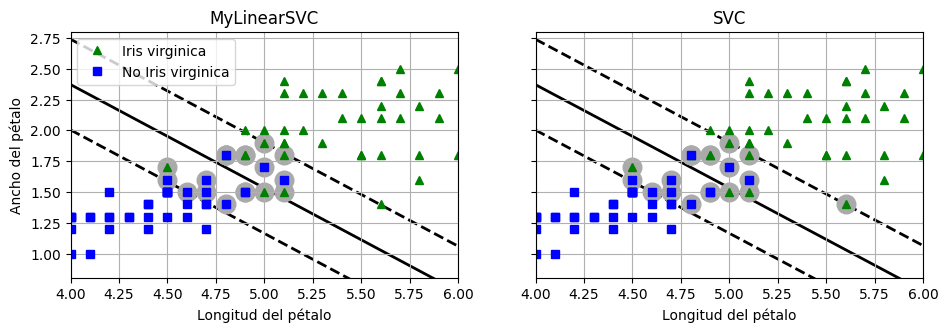

In [30]:
# Visualizamos y comparamos las fronteras de decisión de MyLinearSVC y SVC
yr = y.ravel()
fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)
plt.sca(axes[0])
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs", label="No Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.title("MyLinearSVC")
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^")
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Longitud del pétalo")
plt.title("SVC")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()

In [ ]:
# Finalmente, entrenamos un clasificador SVM usando SGD (descenso de gradiente estocástico)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y)

m = len(X)
t = np.array(y).reshape(-1, 1) * 2 - 1  # Convertimos etiquetas a -1 y +1
X_b = np.c_[np.ones((m, 1)), X]  # Añadimos la entrada del sesgo (x0 = 1)
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print("Parámetros SGDClassifier:", sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5, 3.2))
plt.plot(X[:, 0][yr == 1], X[:, 1][yr == 1], "g^")
plt.plot(X[:, 0][yr == 0], X[:, 1][yr == 0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Ancho del pétalo")
plt.title("SGDClassifier")
plt.axis([4, 6, 0.8, 2.8])
plt.grid()

plt.show()